## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
from keras.regularizers import l1, l2, l1_l2

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:

def build_mlp(input_shape, output_units=10, num_neurons=[256,128,64], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP=[1e-2, 1e-4, 1e-8, 1e-12]

# L2

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = L2 %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = L2 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [=====

50000/50000 [==============================] - 5s 108us/step - loss: 1.4614 - accuracy: 0.5121 - val_loss: 1.5137 - val_accuracy: 0.4850
Epoch 17/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.4434 - accuracy: 0.5189 - val_loss: 1.4994 - val_accuracy: 0.4910
Epoch 18/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.4309 - accuracy: 0.5224 - val_loss: 1.5157 - val_accuracy: 0.4834
Epoch 19/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.4145 - accuracy: 0.5275 - val_loss: 1.4863 - val_accuracy: 0.4923
Epoch 20/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.3997 - accuracy: 0.5341 - val_loss: 1.5069 - val_accuracy: 0.4891
Epoch 21/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.3856 - accuracy: 0.5389 - val_loss: 1.5032 - val_accuracy: 0.4940
Epoch 22/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.3736 - accuracy: 0.5397 - val_loss:

50000/50000 [==============================] - 5s 110us/step - loss: 1.5854 - accuracy: 0.4458 - val_loss: 1.5848 - val_accuracy: 0.4406
Epoch 7/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.5525 - accuracy: 0.4549 - val_loss: 1.5548 - val_accuracy: 0.4541
Epoch 8/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5215 - accuracy: 0.4681 - val_loss: 1.5293 - val_accuracy: 0.4599
Epoch 9/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.4952 - accuracy: 0.4742 - val_loss: 1.5102 - val_accuracy: 0.4644
Epoch 10/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.4708 - accuracy: 0.4834 - val_loss: 1.4901 - val_accuracy: 0.4719
Epoch 11/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.4489 - accuracy: 0.4915 - val_loss: 1.4691 - val_accuracy: 0.4829
Epoch 12/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.4282 - accuracy: 0.4986 - val_loss: 1.

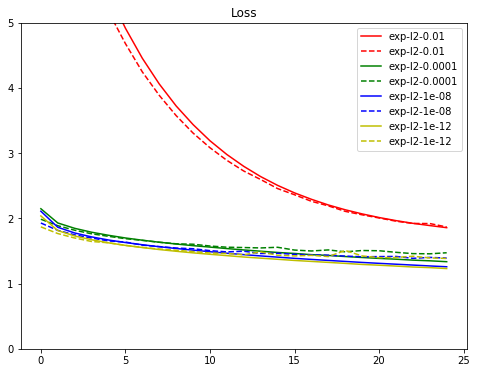

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

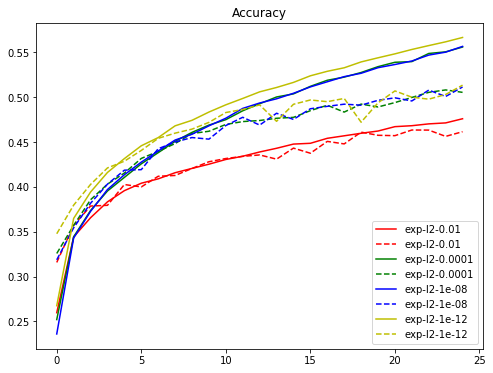

In [10]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

SGD l2 lr 過小不準

# L1

In [11]:
def build_mlp_l1(input_shape, output_units=10, num_neurons=[256,128,64], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer L1 = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer L1 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [=====

50000/50000 [==============================] - 6s 111us/step - loss: 2.9162 - accuracy: 0.5038 - val_loss: 2.9728 - val_accuracy: 0.4768
Epoch 17/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.8747 - accuracy: 0.5103 - val_loss: 2.9448 - val_accuracy: 0.4779
Epoch 18/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.8360 - accuracy: 0.5145 - val_loss: 2.8969 - val_accuracy: 0.4872
Epoch 19/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.7977 - accuracy: 0.5179 - val_loss: 2.8550 - val_accuracy: 0.4944
Epoch 20/25
50000/50000 [==============================] - 6s 126us/step - loss: 2.7584 - accuracy: 0.5232 - val_loss: 2.8034 - val_accuracy: 0.5014
Epoch 21/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.7192 - accuracy: 0.5302 - val_loss: 2.7888 - val_accuracy: 0.4972
Epoch 22/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.6836 - accuracy: 0.5314 - val_loss:

50000/50000 [==============================] - 6s 114us/step - loss: 1.6134 - accuracy: 0.4334 - val_loss: 1.6092 - val_accuracy: 0.4339
Epoch 7/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.5797 - accuracy: 0.4453 - val_loss: 1.5781 - val_accuracy: 0.4423
Epoch 8/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.5508 - accuracy: 0.4563 - val_loss: 1.5523 - val_accuracy: 0.4507
Epoch 9/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.5236 - accuracy: 0.4609 - val_loss: 1.5416 - val_accuracy: 0.4528
Epoch 10/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.4987 - accuracy: 0.4723 - val_loss: 1.5195 - val_accuracy: 0.4645
Epoch 11/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.4746 - accuracy: 0.4806 - val_loss: 1.5059 - val_accuracy: 0.4651
Epoch 12/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.4547 - accuracy: 0.4863 - val_loss: 1.

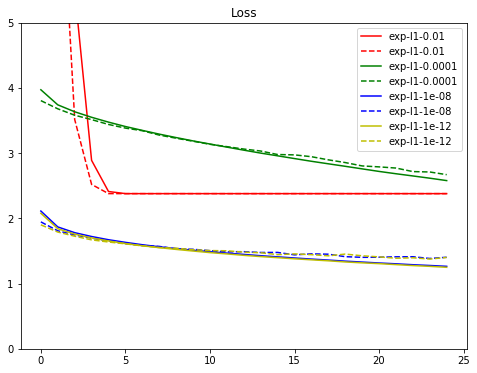

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

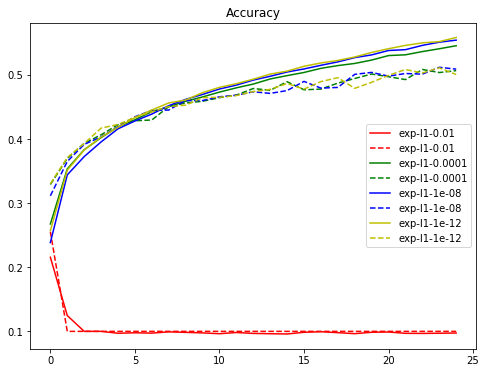

In [14]:

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
SGD L1 lr 需足夠小

# L1_L2

In [15]:
def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[256,128,64], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
results = {}
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer L1_L2 = %.6f" % (regulizer_ratio))
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer L1_L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==

50000/50000 [==============================] - 6s 113us/step - loss: 2.4766 - accuracy: 0.4428 - val_loss: 2.4215 - val_accuracy: 0.4367
Epoch 17/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.3607 - accuracy: 0.4429 - val_loss: 2.3285 - val_accuracy: 0.4324
Epoch 18/25
50000/50000 [==============================] - 6s 113us/step - loss: 2.2653 - accuracy: 0.4445 - val_loss: 2.2520 - val_accuracy: 0.4343
Epoch 19/25
50000/50000 [==============================] - 6s 113us/step - loss: 2.1830 - accuracy: 0.4476 - val_loss: 2.1534 - val_accuracy: 0.4425
Epoch 20/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.1145 - accuracy: 0.4485 - val_loss: 2.0996 - val_accuracy: 0.4398
Epoch 21/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.0601 - accuracy: 0.4516 - val_loss: 2.0422 - val_accuracy: 0.4424
Epoch 22/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.0118 - accuracy: 0.4521 - val_loss:

50000/50000 [==============================] - 6s 112us/step - loss: 4.9152 - accuracy: 0.3999 - val_loss: 4.6765 - val_accuracy: 0.4026
Epoch 7/25
50000/50000 [==============================] - 6s 114us/step - loss: 4.4552 - accuracy: 0.4073 - val_loss: 4.2425 - val_accuracy: 0.4136
Epoch 8/25
50000/50000 [==============================] - 6s 113us/step - loss: 4.0605 - accuracy: 0.4143 - val_loss: 3.8819 - val_accuracy: 0.4156
Epoch 9/25
50000/50000 [==============================] - 6s 118us/step - loss: 3.7245 - accuracy: 0.4196 - val_loss: 3.5713 - val_accuracy: 0.4195
Epoch 10/25
50000/50000 [==============================] - 6s 113us/step - loss: 3.4368 - accuracy: 0.4234 - val_loss: 3.3122 - val_accuracy: 0.4274
Epoch 11/25
50000/50000 [==============================] - 6s 113us/step - loss: 3.1906 - accuracy: 0.4294 - val_loss: 3.0770 - val_accuracy: 0.4352
Epoch 12/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.9809 - accuracy: 0.4336 - val_loss: 2.

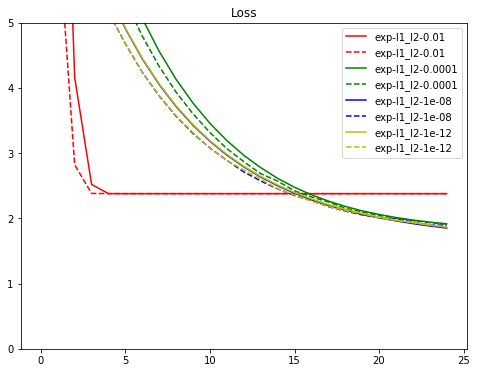

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

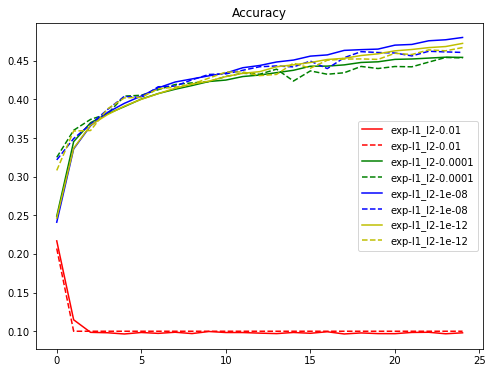

In [18]:

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

SGD l1_l2, lr 需足夠小